# Data Science - Module 3 - Final Project Submission

* Student Name: **James Toop**
* Student Pace: **Self Paced**
* Scheduled project review date/time: **TBC**
* Instructor name: **Jeff Herman**
* Blog post URL: **TBC**

## Table of Contents
1. [Business Case](#business-case)
2. [Exploratory Data Analysis](#eda)
    1. [Discovery](#data-discovery)
    2. [Updated Field Descriptions](#updated-field-descriptions)
    3. [Preprocessing](#data-preprocessing)
    4. [Visualisations](#data-visualisations)
    
3. [Modelling](#modelling)
    1. [Logistic Regression](#logistic-regression)
    2. [Bagged Tree](#bagged-tree)
    3. [Random Forest with GridSearchCV](#random-forest)
    4. [XGBoost with GridSearchCV](#xgboost)
    5. [Modelling Summary](#modelling-summary)
    
4. [Competition Submission File](#competition-submission-file)

---
<a name="business-case"></a>
## 1. Business Case / Project Scope

Tanzania has a water and sanitation crisis. Only 50% of the population of 53 million have access to an improved source of safe water, and 34% of the population has access to improved sanitation. The demand for both water and sanitation is high.

Water is an essential of life, yet millions around the world still don’t have access to clean water. One of the most common causes of death in the developing world is drinking dirty and diseased water.

Did you know 748 Million people in the world don’t have access to safe water?

Water wells provide clean water for years. In rural areas, they are a lifeline for the inhabitants as this may be the only source of potable water.

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, 
which need some repairs, and which don't work at all? This is an intermediate-level practice competition. 
Predict one of these three classes based on a number of variables about what kind of pump is operating, 
when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve 
maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

The goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

---
<a name="eda"></a>
## 2. Exploratory Data Analysis (EDA)

<a name="data-discovery"></a>
### 2A. Data Discovery

This section presents an initial step to investigate, understand and document the available data fields and relationships, highlighting any potential issues / shortcomings within the datasets supplied.

In [1]:
# Import the relevant libraries for data discovery and exploratory data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set styles and color palette for Seaborn
plt.style.use('seaborn-whitegrid')
traffic_light_palette = ['#4d8b26','#f2a81d','#cc3232']
sns.set_palette(sns.color_palette(traffic_light_palette))

In [2]:
# Import the waterpoints training data file from the repository then inspect the data
waterpoints = pd.read_csv('training-set-values.csv')
waterpoints.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
waterpoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [4]:
waterpoints.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [5]:
# View unique values for category fields (Refactored to streamline repetitive code into a function)

def output_field_values(fields):
    for field in fields:        
        field_values = np.sort(waterpoints[field].value_counts())
        print(len(field_values),"\033[1m",field,"\033[0m options:\n")
        print(waterpoints[field].value_counts(normalize=True))
        print("\n")


output_field_values(['scheme_management',
                     'permit',
                     'extraction_type',
                     'extraction_type_group',
                     'extraction_type_class',
                     'management',
                     'management_group',
                     'payment',
                     'payment_type',
                     'water_quality',
                     'quality_group',
                     'quantity',
                     'quantity_group',
                     'source',
                     'source_type',
                     'source_class',
                     'waterpoint_type',
                     'waterpoint_type_group'
                    ])

12  scheme_management  options:

VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64


2  permit  options:

True     0.68955
False    0.31045
Name: permit, dtype: float64


18  extraction_type  options:

gravity                      0.450842
nira/tanira                  0.137273
other                        0.108249
submersible                  0.080202
swn 80                       0.061785
mono                         0.048232
india mark ii                0.040404
afridev                      0.029798
ksb                          0.023822
other - rope pump            0.007593
other - swn 81               0.003855
windmill                     0.001970
indi

In [6]:
waterpoints['construction_year'].value_counts().sort_index()

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

In [7]:
waterpoints['installer'].value_counts()

DWE               17402
Government         1825
RWE                1206
Commu              1060
DANIDA             1050
                  ...  
Central basin         1
WW                    1
Kamata project        1
Jerem                 1
KKKT Leguruki         1
Name: installer, Length: 2145, dtype: int64

In [8]:
# Check to see how many NULL values are contained within the dataset and in which fields
waterpoints.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
# Import the waterpoints training labels data file from the repository then inspect the data
waterpoints_status = pd.read_csv('training-set-labels.csv')
waterpoints_status.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
waterpoints_status['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [11]:
len(waterpoints_status)

59400

<a name="updated-field-descriptions"></a>
### 2B. Updated Field Descriptions

* **`amount_tsh`** : Total static head (amount of water available to waterpoint)
* **`date_recorded`** : The date the row was entered
* **`funder`** : Who funded the well
* **`gps_height`** : Altitude of the well
* **`installer`** : Organization that installed the well
* **`longitude`** : GPS coordinate
* **`latitude`** : GPS coordinate
* **`wpt_name`** : Name of the waterpoint if there is one
* **`num_private`** : NO FIELD DEFINITION, CONSIDER DROPPING
* **`basin`** : Geographic water basin
* **`subvillage`** : Geographic location
* **`region`** : Geographic location
* **`region_code`** : Geographic location (coded)
* **`district_code`** : Geographic location (coded)
* **`lga`** : Geographic location
* **`ward`** : Geographic location
* **`population`** : Population around the well : DATA APPEARS INCOSISTENT OR INCORRECT, CONSIDER DROPPING
* **`public_meeting`** : NO FIELD DEFINITION, CONSIDER DROPPING
    * True
    * False
* **`recorded_by`** : Group entering this row of data
* **`scheme_management`** : Who operates the waterpoint
    * VWC
    * WUG
    * Water authority
    * WUA
    * Water Board
    * Parastatal
    * Private operator
    * Company
    * Other
    * SWC
    * Trust
    * None
* **`scheme_name`** : Who operates the waterpoint : LARGE NUMBER OF NULL VALUES / RELEVANCE CONSIDER DROPPING
* **`permit`** : If the waterpoint is permitted
    * True
    * False
* **`construction_year`** : Year the waterpoint was constructed
* **`extraction_type`** : The kind of extraction the waterpoint uses (brand names of pumps) : DETAIL OF **`extraction_type_group`** FIELD
    * gravity
    * nira/tanira
    * other
    * submersible
    * swn 80
    * mono
    * india mark ii
    * afridev
    * ksb 
    * other - rope pump
    * other - swn 81
    * windmill
    * india mark iii
    * cemo
    * other - play pump
    * walimi
    * climax
    * other - mkulima/shinyanga
* **`extraction_type_group`** : The kind of extraction the waterpoint uses : GROUPED CLASS OF **`extraction_type`** FIELD
    * gravity
    * nira/tanira
    * other
    * submersible
    * swn 80
    * mono
    * india mark ii
    * afridev
    * rope pump
    * other handpump
    * other motorpump
    * wind-powered
    * india mark iii
* **`extraction_type_class`** : The kind of extraction the waterpoint uses : GROUPED CLASS OF **`extraction_type`** FIELD
    * gravity
    * handpump
    * other
    * submersible
    * motorpump
    * rope pump
    * wind-powered
* **`management`** : How the waterpoint is managed : DETAIL OF **`management_group`** FIELD
    * vwc
    * wug
    * water board
    * wua
    * private operator
    * [parastatal](https://www.collinsdictionary.com/dictionary/english/parastatal)
    * water authority
    * other
    * company
    * unknown
    * other - school
    * trust
* **`management_group`** : How the waterpoint is managed : GROUPED CLASS OF **`management`** FIELD
    * user-group
    * commercial
    * [parastatal](https://www.collinsdictionary.com/dictionary/english/parastatal)
    * other
    * unknown
* **`payment`** : Whether the water is paid for and how : DETAIL OF **`payment_type`** FIELD
    * never pay
    * pay per bucket
    * pay monthly
    * pay when scheme fails
    * pay annually
    * other
    * unknown
* **`payment_type`** : Whether the water is paid for and how : GROUPED CLASS OF **`payment`** FIELD
    * never pay
    * per bucket
    * monthly
    * on failure
    * annually
    * other
    * unknown
* **`water_quality`** : The quality of the water : DETAIL OF **`quality_group`** FIELD
    * soft
    * salty
    * soft
    * salty
    * milky
    * coloured
    * salty abandoned
    * fluoride
    * flouride abandoned
    * unknown
* **`quality_group`** : The quality of the water : GROUPED CLASS OF **`water_quality`** FIELD
    * good
    * salty
    * milky
    * colored
    * fluoride
    * unknown
* **`quantity`** : The quantity of water : DETAIL OF **`quantity_group`** FIELD
    * enough
    * insufficient
    * dry
    * seasonal
    * unknown
* **` quantity_group`** : The quantity of water : GROUPED CLASS OF **`quantity`** FIELD
    * enough
    * insufficient
    * dry
    * seasonal
    * unknown
* **`source`** : The source of the water : DETAIL OF **`source_type`** FIELD
    * spring
    * shallow well
    * machine dbh
    * river
    * rainwater harvesting
    * hand dtw
    * lake
    * dam
    * other
    * unknown
* **`source_type`** : The source of the water : GROUPED CLASS OF **`source`** FIELD
    * spring
    * shallow well
    * borehole
    * river/lake
    * rainwater harvesting
    * dam
    * other
* **`source_class`** : The source of the water
    * groundwater
    * surface
    * unknown
* **`waterpoint_type`** : The kind of waterpoint : DETAIL OF **`waterpoint_type_group`** FIELD
    * communal standpipe
    * hand pump
    * communal standpipe multiple
    * improved spring
    * cattle trough
    * dam
    * other    
* **`waterpoint_type_group`** : The kind of waterpoint : GROUPED CLASS OF **`waterpoint_type`** FIELD
    * communal standpipe
    * hand pump
    * improved spring
    * cattle trough
    * dam
    * other

<a name="data-preprocessing"></a>
### 2C. Data Preprocessing

In [12]:
# Check for duplicate records in the waterpoints dataframe
len(waterpoints[waterpoints.duplicated()])

0

In [13]:
# Check for duplicate records in the waterpoints status dataframe
len(waterpoints_status[waterpoints_status.duplicated()])

0

In [14]:
# Data preprocessing, converting data types and handling missing data
waterpoints['construction_year'] = waterpoints['construction_year'].fillna(0).astype(int)

# Create additional field to categorise the age of the waterpoint
age_conditions = [
    (waterpoints['construction_year'] >= 2000),
    (waterpoints['construction_year'] >= 1990) & (waterpoints['construction_year'] <= 1999),
    (waterpoints['construction_year'] >= 1980) & (waterpoints['construction_year'] <= 1989),
    (waterpoints['construction_year'] >= 1970) & (waterpoints['construction_year'] <= 1979),
    (waterpoints['construction_year'] >= 1960) & (waterpoints['construction_year'] <= 1969),
    (waterpoints['construction_year'] == 0)]
age_values = ['5-noughties','4-nineties','3-eighties','2-seventies','1-sixties','0-unknown']
waterpoints['construction_decade'] = np.select(age_conditions, age_values)
waterpoints.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,construction_decade
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,4-nineties
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,5-noughties
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,5-noughties
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,3-eighties
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0-unknown


In [15]:
# Create combined dataframe of waterpoints and status
waterpoints_with_status = pd.merge(left=waterpoints, 
                                   right=waterpoints_status, 
                                   left_on='id', 
                                   right_on='id')
waterpoints_with_status.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,construction_decade,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,4-nineties,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,5-noughties,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,5-noughties,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,3-eighties,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0-unknown,functional


In [16]:
# Create additional field to convert the status group to an integer
status_conditions = [
    (waterpoints_with_status['status_group'] == 'non functional'),
    (waterpoints_with_status['status_group'] == 'functional'),
    (waterpoints_with_status['status_group'] == 'functional needs repair')]
status_values = [0, 1, 2]
waterpoints_with_status['status'] = np.select(status_conditions, status_values)
waterpoints_with_status.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,construction_decade,status_group,status
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,4-nineties,functional,1
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,5-noughties,functional,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,5-noughties,functional,1
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,3-eighties,non functional,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0-unknown,functional,1


In [17]:
# Drop specific columns where data is either significantly incomplete, duplicated or of a little value to the model.
waterpoints_processed = waterpoints_with_status.drop([
    'amount_tsh',
    'date_recorded',
    'funder',
    'scheme_management',
    'installer',
    'wpt_name',
    'num_private',
    'subvillage',
    'region_code',
    'district_code',
    'lga',
    'ward',
    'population',
    'public_meeting',
    'recorded_by',
    'scheme_name',
    'permit',
    'construction_year',
    'extraction_type',
    'extraction_type_group',
    'management',
    'payment',
    'water_quality',
    'quantity',
    'source',
    'waterpoint_type'], axis=1)

In [18]:
waterpoints_processed.head()

,id,gps_height,longitude,latitude,basin,region,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,source_class,waterpoint_type_group,construction_decade,status_group,status
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Iringa,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,4-nineties,functional,1
1,8776,1399,34.698766,-2.147466,Lake Victoria,Mara,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,5-noughties,functional,1
2,34310,686,37.460664,-3.821329,Pangani,Manyara,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,5-noughties,functional,1
3,67743,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,3-eighties,non functional,0
4,19728,0,31.130847,-1.825359,Lake Victoria,Kagera,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,0-unknown,functional,1


<a name="data-visualisations"></a>
### 2D. Data Visualisations

In [19]:
# Create a new dataframe specifically for the data visualisations as some additional processing steps will arise as 
# a result and drop unnecessary columns.
waterpoints_visuals = waterpoints_with_status.drop([
    'amount_tsh',
    'date_recorded',
    'funder',
    'gps_height',
    'installer',
    'wpt_name',
    'num_private',
    'basin',
    'subvillage',
    'region_code',
    'district_code',
    'lga',
    'ward',
    'population',
    'public_meeting',
    'recorded_by',
    'scheme_name',
    'permit',
    'construction_year',
    'extraction_type',
    'extraction_type_group',
    'management',
    'payment',
    'water_quality',
    'quantity',
    'source',
    'waterpoint_type'], axis=1)

waterpoints_visuals = waterpoints_visuals[(waterpoints_visuals['waterpoint_type_group'] != 'cattle trough')]

# One hot encode the waterpoint status but don't drop first as this is only for visualisation purposes 
status_group_dummies = pd.get_dummies(waterpoints_visuals['status_group'], drop_first=False, dtype=int)

In [20]:
source_type_chart_data = pd.concat([waterpoints_visuals['source_type'], status_group_dummies], axis=1)
source_type_chart_data = source_type_chart_data.set_index('source_type').groupby('source_type').sum()

# Add "total" column and sort the dataframe based on the total number of waterpoints in descending order
source_type_chart_data["total"] = (source_type_chart_data['functional'] +
                                   source_type_chart_data['functional needs repair'] +
                                   source_type_chart_data['non functional'])
  
source_type_chart_data = source_type_chart_data.sort_values("total", ascending=False)
source_type_chart_data = source_type_chart_data.drop("total", axis=1)

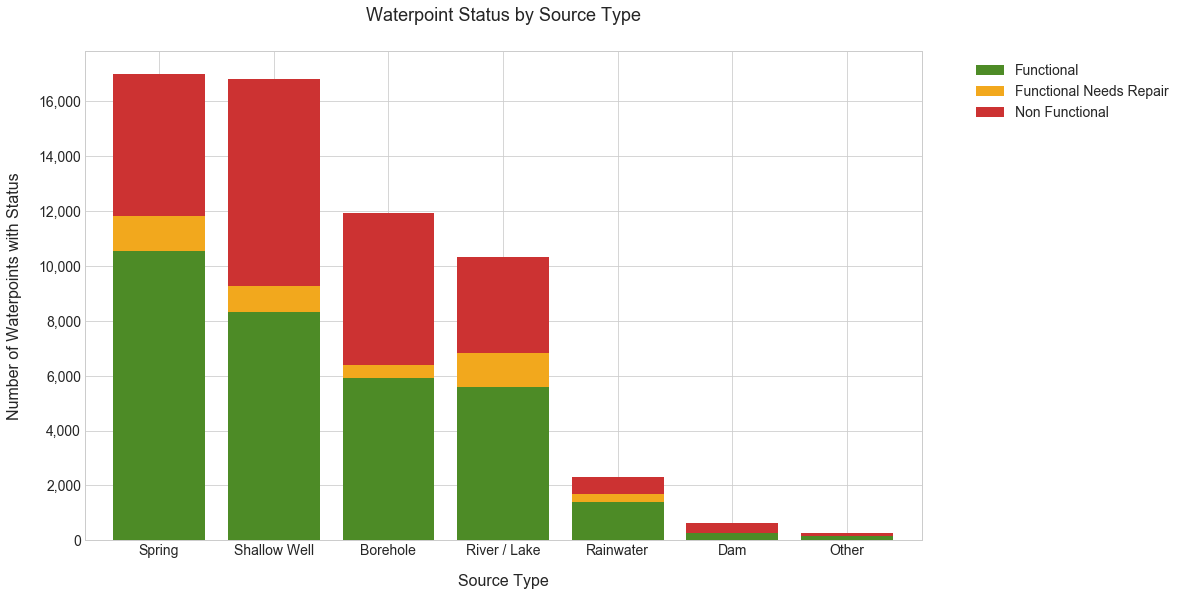

In [21]:
# Create a bar chart to display the number of waterpoints by source type with status
x_labels = ['Spring','Shallow Well','Borehole','River / Lake','Rainwater','Dam','Other']
y_labels = ['0','2,000','4,000','6,000','8,000','10,000','12,000','14,000','16,000']

ax = source_type_chart_data.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
ax.set_title('Waterpoint Status by Source Type', fontsize=18, pad=30)
ax.set_xlabel('Source Type', fontsize=16, labelpad=16)
ax.set_ylabel('Number of Waterpoints with Status', fontsize=16, labelpad=16)
ax.set_xticklabels(x_labels, 
                   fontsize=14, 
                   rotation=0)
ax.set_yticklabels(y_labels, 
                   fontsize=14)

plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

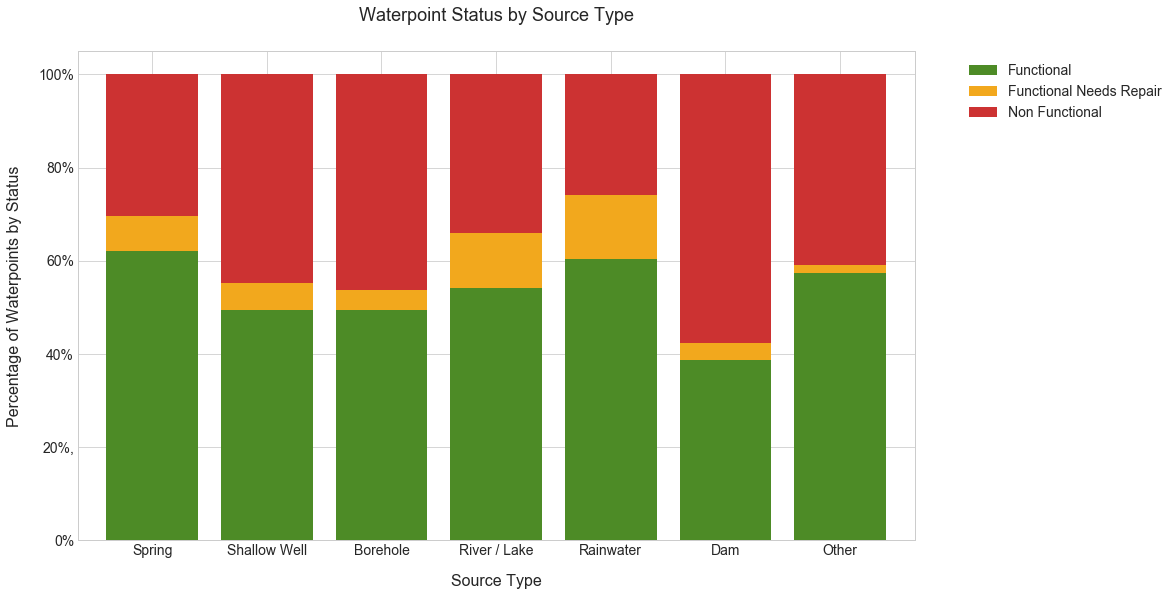

In [22]:
# Create a 100% stacked bar chart to display status of waterpoints by source type
source_type_stacked = source_type_chart_data.apply(lambda x: x*100/sum(x), axis=1)

x_labels = ['Spring','Shallow Well','Borehole','River / Lake','Rainwater','Dam','Other']
y_labels = ['0%','20%,','40%','60%','80%','100%']

ax = source_type_stacked.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
ax.set_title('Waterpoint Status by Source Type', fontsize=18, pad=30)
ax.set_xlabel('Source Type', fontsize=16, labelpad=16)
ax.set_ylabel('Percentage of Waterpoints by Status', fontsize=16, labelpad=16)
ax.set_xticklabels(x_labels, 
                   fontsize=14, 
                   rotation=0)
ax.set_yticklabels(y_labels, 
                   fontsize=14)

plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

In [23]:
management_group_chart_data = pd.concat([waterpoints_visuals['management_group'], status_group_dummies], axis=1)
management_group_chart_data = management_group_chart_data.set_index('management_group').groupby('management_group').sum()

# Add "total" column and sort the dataframe based on the total number of waterpoints in descending order
management_group_chart_data["total"] = (management_group_chart_data['functional'] +
                                        management_group_chart_data['functional needs repair'] +
                                        management_group_chart_data['non functional'])
  
management_group_chart_data = management_group_chart_data.sort_values("total", ascending=False)
management_group_chart_data = management_group_chart_data.drop("total", axis=1)

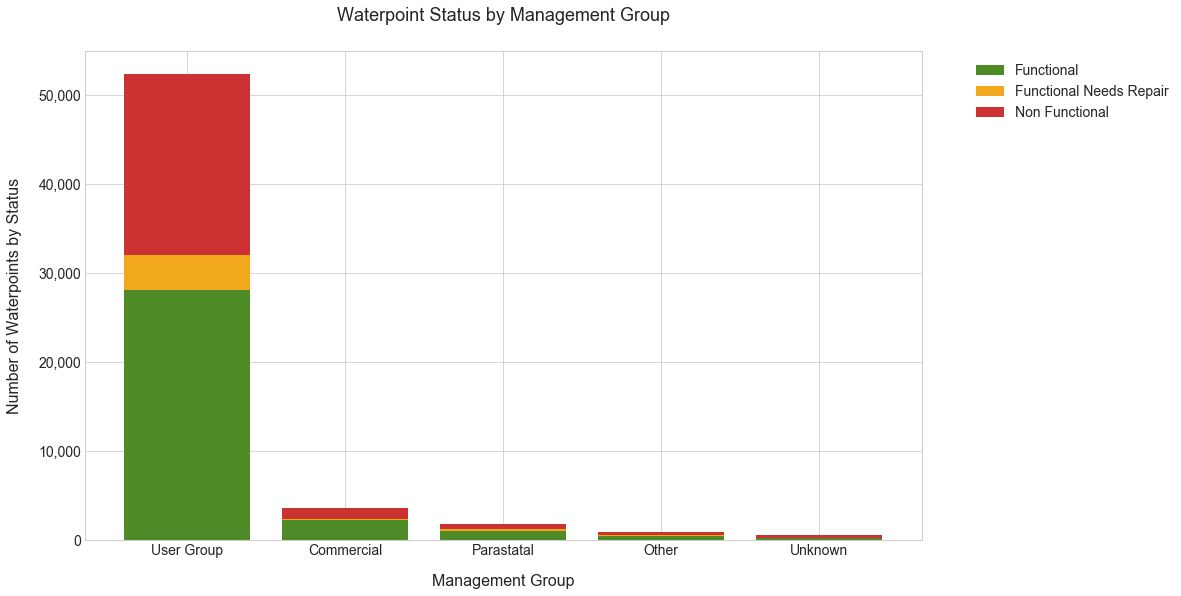

In [24]:
# Create a bar chart to display the number of waterpoints by management group with status
x_labels = ['User Group','Commercial','Parastatal','Other','Unknown']
y_labels = ['0','10,000','20,000','30,000','40,000','50,000']

ax = management_group_chart_data.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
ax.set_title('Waterpoint Status by Management Group', fontsize=18, pad=30)
ax.set_xlabel('Management Group', fontsize=16, labelpad=16)
ax.set_ylabel('Number of Waterpoints by Status', fontsize=16, labelpad=16)
ax.set_xticklabels(x_labels, 
                   fontsize=14, 
                   rotation=0)
ax.set_yticklabels(y_labels, 
                   fontsize=14)

plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

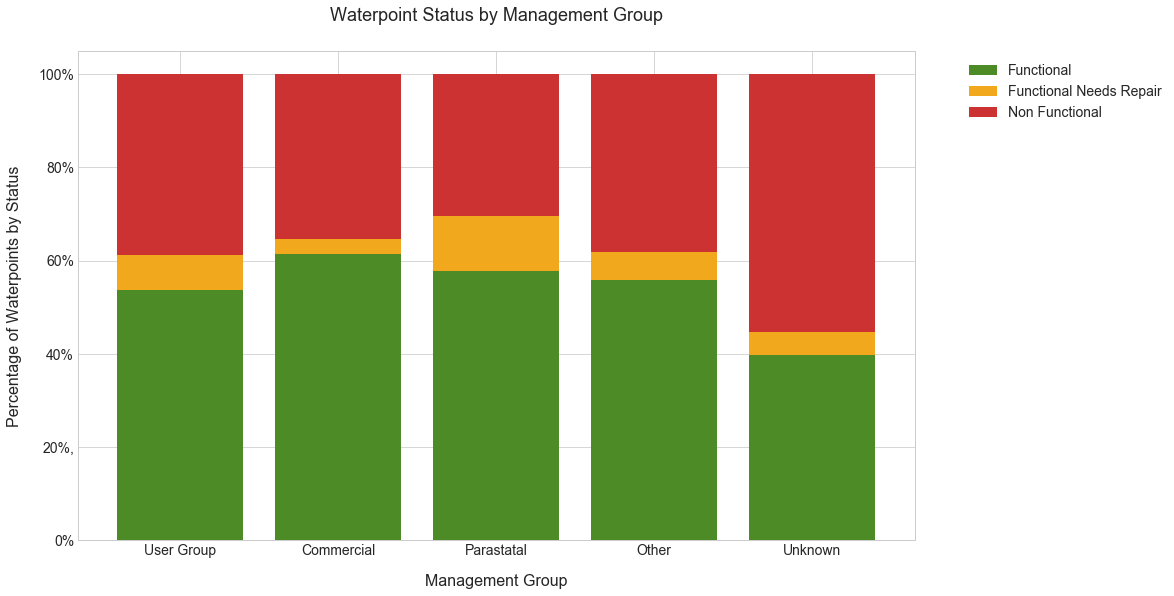

In [25]:
# Create a 100% stacked bar chart to display status of waterpoints by management group
management_group_stacked = management_group_chart_data.apply(lambda x: x*100/sum(x), axis=1)

x_labels = ['User Group','Commercial','Parastatal','Other','Unknown']
y_labels = ['0%','20%,','40%','60%','80%','100%']

ax = management_group_stacked.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
ax.set_title('Waterpoint Status by Management Group', fontsize=18, pad=30)
ax.set_xlabel('Management Group', fontsize=16, labelpad=16)
ax.set_ylabel('Percentage of Waterpoints by Status', fontsize=16, labelpad=16)
ax.set_xticklabels(x_labels, 
                   fontsize=14, 
                   rotation=0)
ax.set_yticklabels(y_labels, 
                   fontsize=14)

plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

In [26]:
extraction_type_chart_data = pd.concat([waterpoints_visuals['extraction_type_class'], status_group_dummies], axis=1)
extraction_type_chart_data = extraction_type_chart_data.set_index('extraction_type_class').groupby('extraction_type_class').sum()

# Add "total" column and sort the dataframe based on the total number of waterpoints in descending order
extraction_type_chart_data["total"] = (extraction_type_chart_data['functional'] +
                                       extraction_type_chart_data['functional needs repair'] +
                                       extraction_type_chart_data['non functional'])
  
extraction_type_chart_data = extraction_type_chart_data.sort_values("total", ascending=False)
extraction_type_chart_data = extraction_type_chart_data.drop("total", axis=1)

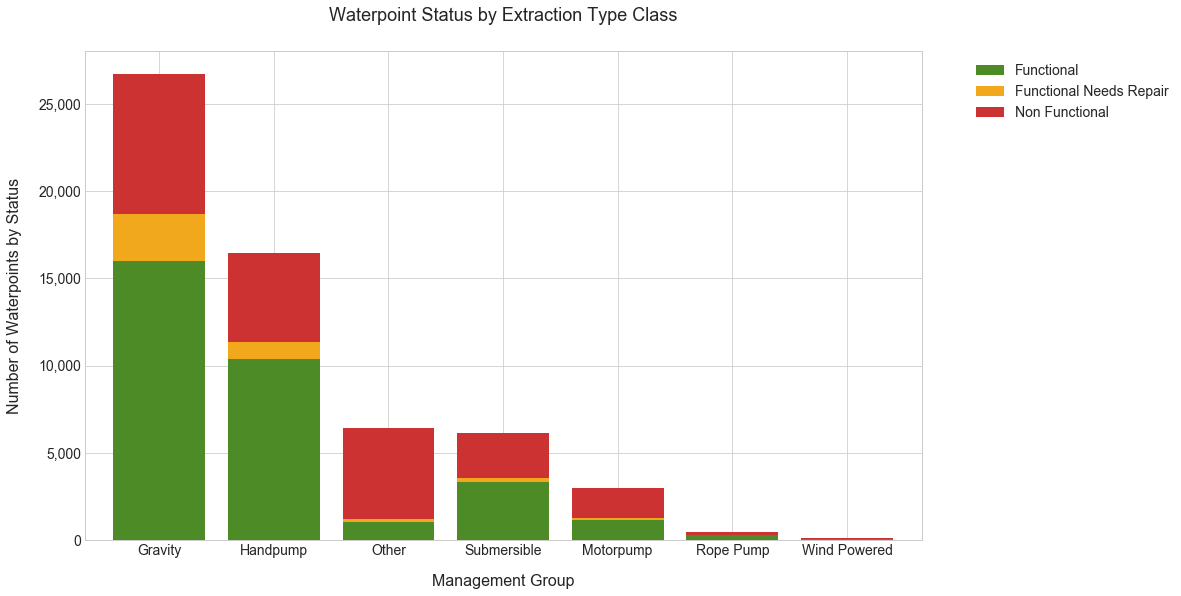

In [27]:
# Create a bar chart to display the number of waterpoints by extraction type class with status
x_labels = ['Gravity','Handpump','Other','Submersible','Motorpump','Rope Pump','Wind Powered']
y_labels = ['0','5,000','10,000','15,000','20,000','25,000']

ax = extraction_type_chart_data.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
ax.set_title('Waterpoint Status by Extraction Type Class', fontsize=18, pad=30)
ax.set_xlabel('Management Group', fontsize=16, labelpad=16)
ax.set_ylabel('Number of Waterpoints by Status', fontsize=16, labelpad=16)
ax.set_xticklabels(x_labels, 
                   fontsize=14, 
                   rotation=0)
ax.set_yticklabels(y_labels, 
                   fontsize=14)

plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

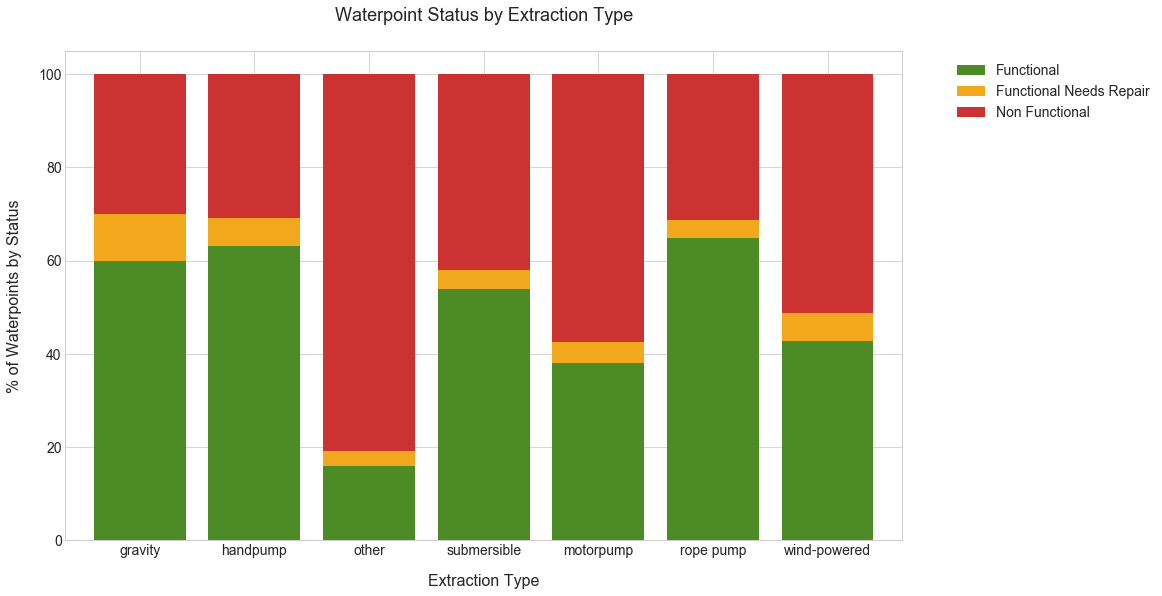

In [28]:
# Create a 100% stacked bar chart to display status of waterpoints by extraction type
extraction_type_stacked = extraction_type_chart_data.apply(lambda x: x*100/sum(x), axis=1)
extraction_type_stacked.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
plt.title('Waterpoint Status by Extraction Type', fontsize=18, pad=30)
plt.xlabel('Extraction Type', fontsize=16, labelpad=16)
plt.xticks(fontsize=14, 
           rotation=0)
plt.ylabel('% of Waterpoints by Status', fontsize=16, labelpad=16)
plt.yticks(fontsize=14)
plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

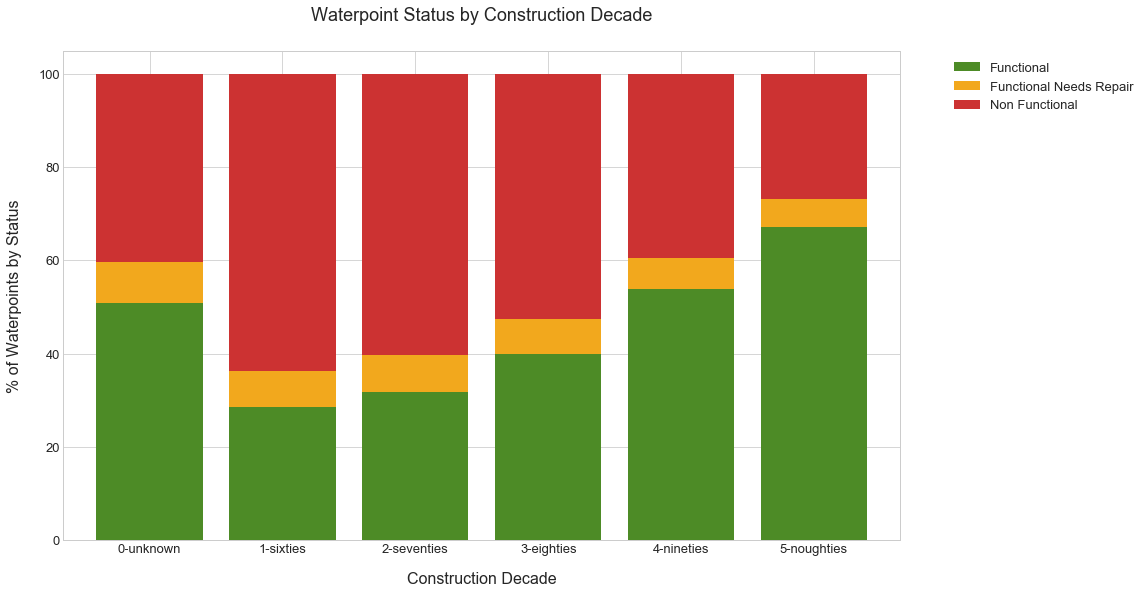

In [29]:
construction_decade_chart_data = pd.concat([waterpoints_visuals['construction_decade'], status_group_dummies], axis=1).set_index('construction_decade').groupby('construction_decade').sum()

# Create a 100% stacked bar chart to display status of waterpoints by decade of construction
construction_decade_stacked = construction_decade_chart_data.apply(lambda x: x*100/sum(x), axis=1)
construction_decade_stacked.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
plt.title('Waterpoint Status by Construction Decade', fontsize=18, pad=30)
plt.xlabel('Construction Decade', fontsize=16, labelpad=16)
plt.xticks(fontsize=13, 
           rotation=0)
plt.ylabel('% of Waterpoints by Status', fontsize=16, labelpad=16)
plt.yticks(fontsize=13)
plt.legend(['Functional','Functional Needs Repair','Non Functional'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
plt.show();

In [30]:
quantity_group_chart_data = pd.concat([waterpoints_visuals['quantity_group'], status_group_dummies], axis=1)
quantity_group_chart_data = quantity_group_chart_data.set_index('quantity_group').groupby('quantity_group').sum()

# Add "total" column and sort the dataframe based on the total number of waterpoints in descending order
quantity_group_chart_data["total"] = (quantity_group_chart_data['functional'] +
                                      quantity_group_chart_data['functional needs repair'] +
                                      quantity_group_chart_data['non functional'])
  
quantity_group_chart_data = quantity_group_chart_data.sort_values("total", ascending=False)
quantity_group_chart_data = quantity_group_chart_data.drop("total", axis=1)

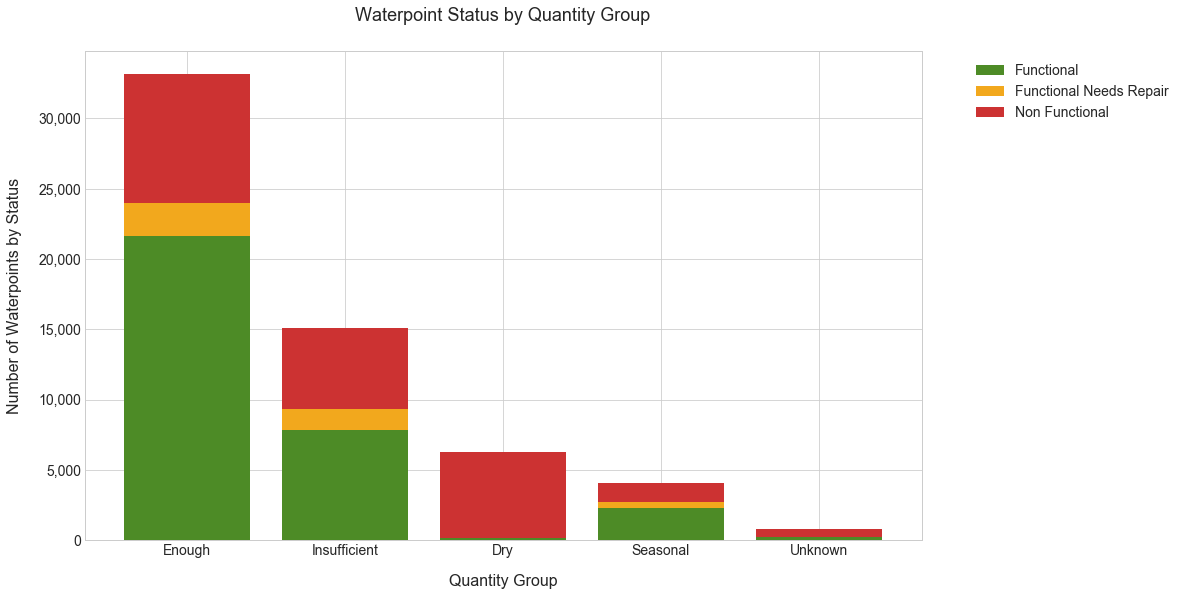

In [31]:
# Create a bar chart to display the number of waterpoints by quantity group with status
x_labels = ['Enough','Insufficient','Dry','Seasonal','Unknown']
y_labels = ['0','5,000','10,000','15,000','20,000','25,000','30,000']

ax = quantity_group_chart_data.plot(kind='bar', stacked=True, figsize=(15,9), width=0.8)
ax.set_title('Waterpoint Status by Quantity Group', fontsize=18, pad=30)
ax.set_xlabel('Quantity Group', fontsize=16, labelpad=16)
ax.set_ylabel('Number of Waterpoints by Status', fontsize=16, labelpad=16)
ax.set_xticklabels(x_labels, 
                   fontsize=14, 
                   rotation=0)
ax.set_yticklabels(y_labels, 
                   fontsize=14)

plt.legend(['Functional','Functional Needs Repair','Non Functional'], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14)
plt.show();

---
<a name="modelling"></a>
# 3. Modelling

In [32]:
# Import the relevant libraries for modelling
import statsmodels as sm
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

<a name="logistic-regression"></a>
### 3A. Logistic Regression

In [33]:
waterpoints_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
id                       59400 non-null int64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment_type             59400 non-null object
quality_group            59400 non-null object
quantity_group           59400 non-null object
source_type              59400 non-null object
source_class             59400 non-null object
waterpoint_type_group    59400 non-null object
construction_decade      59400 non-null object
status_group             59400 non-null object
status                   59400 non-null int64
dtypes: float64(2), int64(3), object(12)
memory usage: 8.2+ MB


In [34]:
x_features = ['basin',
              'region',
              'extraction_type_class',
              'management_group',
              'payment_type',
              'quality_group',
              'quantity_group',
              'source_type',
              'waterpoint_type_group',
              'construction_decade']

# Create dummy variables - no need to normalise as everything is already on the same scale
X = pd.get_dummies(waterpoints_processed[x_features], drop_first=True, dtype=float)
X.head()

,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,...,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,construction_decade_1-sixties,construction_decade_2-seventies,construction_decade_3-eighties,construction_decade_4-nineties,construction_decade_5-noughties
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Set target variable
y = waterpoints_processed['status']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create multinomial / multiclass logisitic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model_log = logreg.fit(X_train, y_train)

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [36]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[3444 2215   19]
 [ 752 7307   39]
 [ 177  866   31]]


In [37]:
target_names = ['non functional', 'functional', 'functional needs repair']
print(classification_report(y_train, y_hat_train, target_names=target_names))

                         precision    recall  f1-score   support

         non functional       0.79      0.61      0.69     17146
             functional       0.70      0.90      0.79     24161
functional needs repair       0.33      0.02      0.05      3243

               accuracy                           0.73     44550
              macro avg       0.61      0.51      0.51     44550
           weighted avg       0.71      0.73      0.70     44550



In [38]:
print(classification_report(y_test, y_hat_test, target_names=target_names))

                         precision    recall  f1-score   support

         non functional       0.79      0.61      0.69      5678
             functional       0.70      0.90      0.79      8098
functional needs repair       0.35      0.03      0.05      1074

               accuracy                           0.73     14850
              macro avg       0.61      0.51      0.51     14850
           weighted avg       0.71      0.73      0.70     14850



Accuracy of 71% for the Logistic regression model which is a good start for an initial, basic.  Achieves an accuracy of 72% for the test data suggesting that the model is not overfitting.

<a name="bagged-tree"></a>
### 3B. Bagged Tree

In [39]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [40]:
bagged_tree.score(X_train, y_train)

0.7140740740740741

In [41]:
bagged_tree.score(X_test, y_test)

0.7123905723905724

<a name="random-forest"></a>
### 3C. Random Forest using GridSearchCV

In [42]:
# Instantiate and fit a RandomForestClassifier
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 75.96%


In [43]:
# Create a parameter grid and use GridSearchCV to find optimal parameters
rf_param_grid = {
    'n_estimators' : [10, 30, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 6, 10],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [3, 6]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Validation Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Validation Accuracy: 76.28%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [44]:
rf_score = rf_grid_search.score(X_test, y_test)

print('Random forest grid search: ', rf_score)

Random forest grid search:  0.7643097643097643


<a name="xgboost"></a>
### 3D. XGBoost with GridSearchCV

In [45]:
import xgboost as xgb

In [46]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 73.54%
Validation Accuracy: 73.29%


In [47]:
xgb_param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [0.7],
    'n_estimators': [5, 30, 100],
}

grid_clf = GridSearchCV(clf, xgb_param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 100
subsample: 0.7

Training Accuracy: 76.39%
Validation accuracy: 75.55%


<a name="svm"></a>
### 3E. SVM

In [48]:
svm_clf = svm.SVC(kernel='poly', decision_function_shape='ovo', cache_size=500)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=500, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
svm_clf.score(X_train, y_train)

0.7792592592592592

In [50]:
svm_clf.score(X_test, y_test)

0.7644444444444445

<a name="modelling-summary"></a>
### 3F. Modelling Summary

x_features =  'basin',
              'region',
              'extraction_type_class',
              'quality_group',
              'quantity_group',
              'source_type',
              'waterpoint_type_group',
              'construction_decade'
              
Logistic Regression = 71%
Random Forest = 75%
XGBoost = 75%

---
<a name="competition-submission-file"></a>
## 4. Competition Submission File

In [51]:
# Import the test set of waterpoints data file from the repository
submit_waterpoints = pd.read_csv('test-set-values.csv')

# Data preprocessing, converting data types and handling missing data as above
submit_waterpoints['construction_year'] = submit_waterpoints['construction_year'].fillna(0).astype(int)

# Create additional field to categorise the age of the waterpoint
age_conditions = [
    (submit_waterpoints['construction_year'] >= 2000),
    (submit_waterpoints['construction_year'] >= 1990) & (submit_waterpoints['construction_year'] <= 1999),
    (submit_waterpoints['construction_year'] >= 1980) & (submit_waterpoints['construction_year'] <= 1989),
    (submit_waterpoints['construction_year'] >= 1970) & (submit_waterpoints['construction_year'] <= 1979),
    (submit_waterpoints['construction_year'] >= 1960) & (submit_waterpoints['construction_year'] <= 1969),
    (submit_waterpoints['construction_year'] == 0)]
age_values = ['5-noughties','4-nineties','3-eighties','2-seventies','1-sixties','0-unknown']
submit_waterpoints['construction_decade'] = np.select(age_conditions, age_values)

# Drop fields that aren't used by the model to produce a prediction
submit_waterpoints = submit_waterpoints.drop([
    'amount_tsh',
    'date_recorded',
    'funder',
    'scheme_management',
    'installer',
    'wpt_name',
    'num_private',
    'subvillage',
    'region_code',
    'district_code',
    'lga',
    'ward',
    'population',
    'public_meeting',
    'recorded_by',
    'scheme_name',
    'permit',
    'construction_year',
    'extraction_type',
    'extraction_type_group',
    'management',
    'payment',
    'water_quality',
    'quantity',
    'source',
    'waterpoint_type'], axis=1)

# One hot encode categorical data for submission dataset in order to produce predictions
X_submit = pd.get_dummies(submit_waterpoints[x_features], drop_first=True, dtype=float)
# X_submit.info()

In [52]:
def create_submission_file(output_filename, model_name):
    submission_values = pd.DataFrame()
    submission_values['status'] = model_name.predict(X_submit)
    submission_data = pd.concat([submit_waterpoints['id'], submission_values], axis=1)
    status_conditions = [
    (submission_data['status'] == 0),
    (submission_data['status'] == 1),
    (submission_data['status'] == 2)]
    status_values = ['non functional', 'functional', 'functional needs repair']
    submission_data['status_group'] = np.select(status_conditions, status_values)
    submission_data = submission_data.drop(['status'], axis=1)
    submission_data.to_csv(output_filename, index=False)

In [54]:
create_submission_file('svm-submission-4.csv', svm_clf)